In [1]:
# import the modules that we need and specify the folder which contains the files
import pandas as pd
import glob, os
import mahotas as mh
import numpy as np
import matplotlib as mpl

from pylab import imshow
from skimage import io
import skimage
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

from skimage.feature import blob_log, blob_doh, blob_dog
from skimage import filters
from skimage.morphology import disk
from math import sqrt

In [2]:
def blob_counting(file):
    image = io.imread(file)
    in_image = np.invert(image)
    
#     image = resize(image, (150, 150))
    
    red = in_image[..., 0]
    green = in_image[..., 1]
    blue = in_image[..., 2]
    
    green = filters.rank.median(green, disk(5))
    
    red_blobs_log = blob_log(green, max_sigma=5, min_sigma = 2, overlap = 0.1, threshold=.15)
    try:
        red_blobs_log[:, 2] = red_blobs_log[:, 2] * sqrt(2)
    except Exception as e:
        print(e)
        pass
    
    green_blobs_log = blob_log(green, max_sigma=5, min_sigma = 3, num_sigma=2, overlap = 0.1, threshold=0.05)
    try:
        green_blobs_log[:, 2] = green_blobs_log[:, 2] * sqrt(2)
    except Exception as e:
        print(e)
        pass

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})
    plt.tight_layout()
    
    ax1.imshow(green, interpolation = 'nearest')
    ax1.set_axis_off()
    ax1.set_title(file.split('.')[0] + '_intermediate_steps')
    for blob in red_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'red', linewidth=1.5, fill=False)
        ax1.add_patch(c)
        
    ax2.imshow(green, interpolation = 'nearest')
    ax2.set_axis_off()
    ax2.set_title(file.split('.')[0] + '_alternative')
    for blob in green_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'green', linewidth=1.5, fill=False)
        ax2.add_patch(c)
    
    ax3.imshow(image, interpolation = 'nearest')
    ax3.set_axis_off()
    ax3.set_title(file.split('.')[0] + '_counting')
    for blob in red_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'blue', linewidth=1.5, fill=False)
        ax3.add_patch(c)
    
    fig.savefig(file.split('.')[0] + '_analysis')
   
    return [len(red_blobs_log), len(green_blobs_log), len(red_blobs_log)]

CPU times: user 1.53 s, sys: 46.5 ms, total: 1.57 s
Wall time: 1.58 s


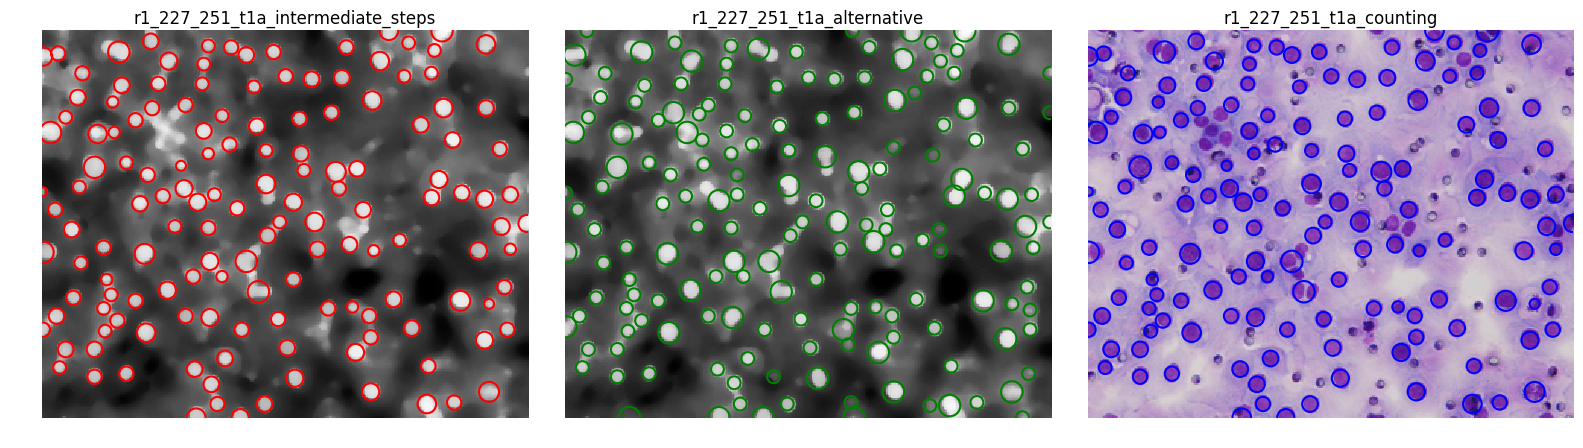

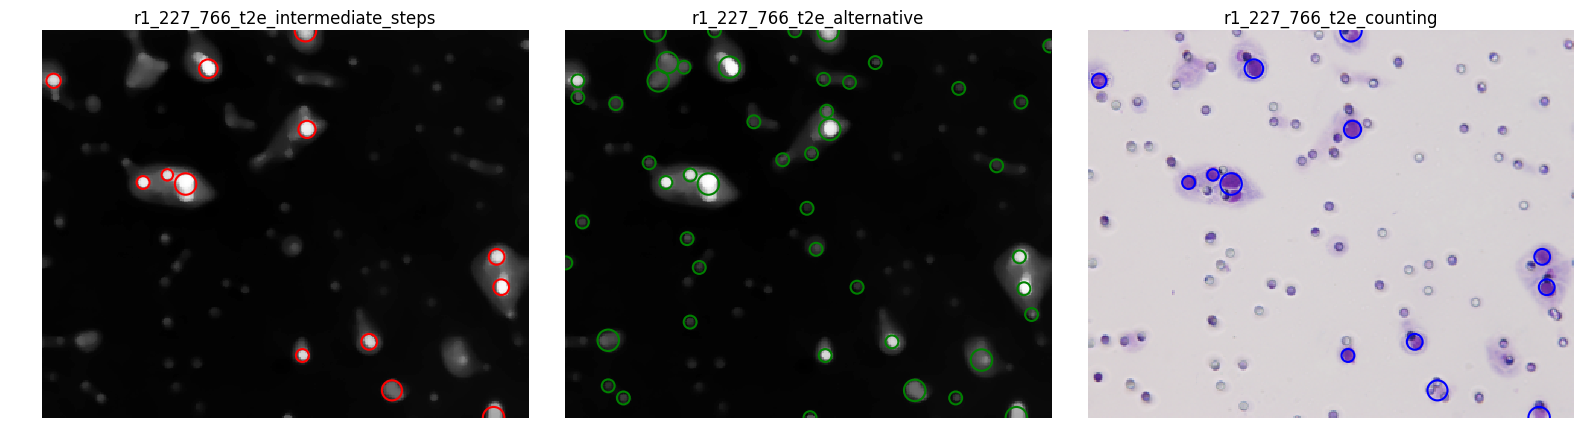

In [3]:
%%time

current_path = %pwd
file_list = os.listdir(current_path)
file_list = [i for i in file_list if i[:3] == 'r1_' and i[-4:] == 'tiff']
result_dictionary = {}
for file in file_list:
    result_dictionary[file.split('.')[0]] = blob_counting(file)

In [4]:
import pandas as pd

analysis = pd.DataFrame(result_dictionary, index = ['intermediate_step', 'alternative', 'counting'])
analysis = analysis.transpose()
analysis.to_csv('measurement_result.csv')
analysis

,intermediate_step,alternative,counting
r1_227_251_t1a,146,168,146
r1_227_766_t2e,13,48,13


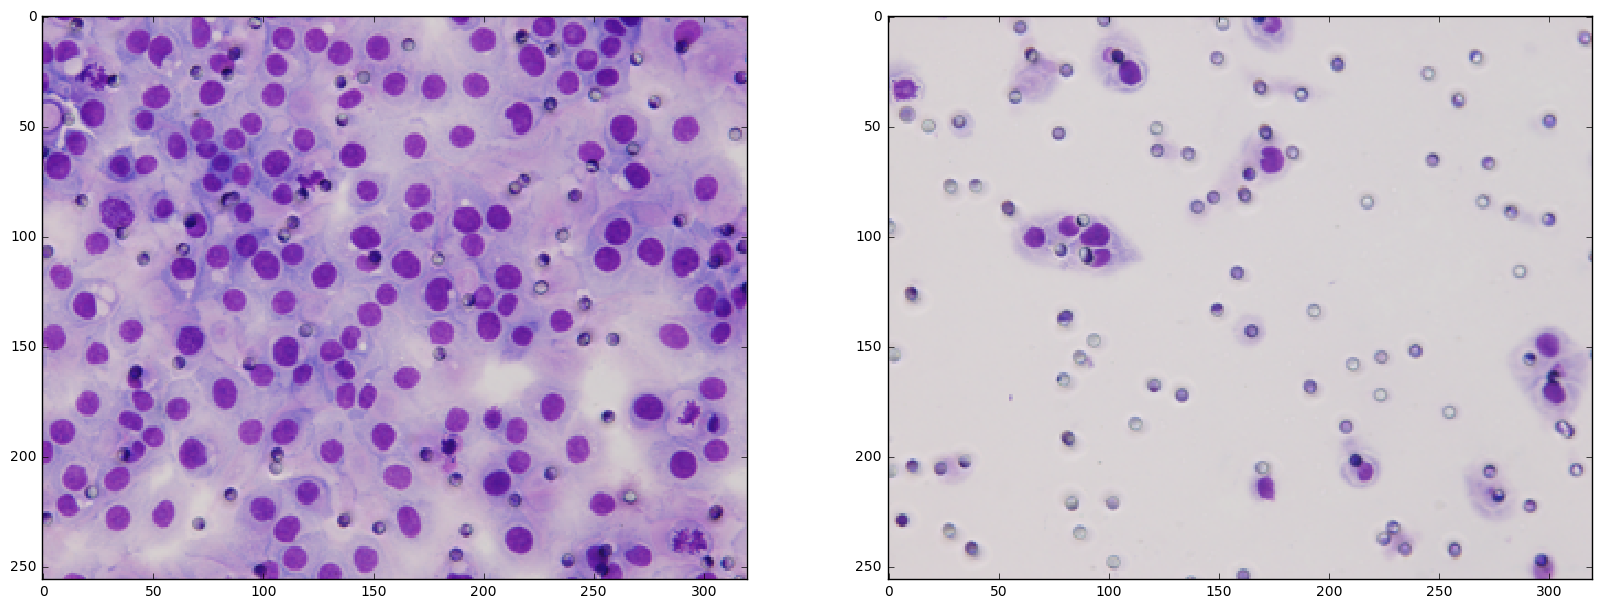

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (20, 10))
ax1.imshow(io.imread('r1_227_251_t1a.tiff'))
ax2.imshow(io.imread('r1_227_766_t2e.tiff'))